#Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

In [4]:
data = pd.read_csv("bank_data_C.csv")

In [5]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
data.describe(include="all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [7]:
data.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


# Data Cleaning

In [10]:
data.head(2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0


In [11]:
data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
# Convert DOB and TransactionDate to datetime objects
data["CustomerDOB"] = pd.to_datetime(data["CustomerDOB"])
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"], format="%d-%m-%Y")


In [15]:
data["TransactionDate"].unique()

array(['2/8/16', '1/8/16', '3/8/16', '5/8/16', '4/8/16', '6/8/16',
       '9/8/16', '8/8/16', '12/8/16', '7/8/16', '21/10/16', '16/10/16',
       '10/8/16', '14/8/16', '17/8/16', '21/8/16', '19/8/16', '24/8/16',
       '22/8/16', '29/8/16', '31/8/16', '22/9/16', '23/9/16', '13/8/16',
       '25/8/16', '28/8/16', '15/8/16', '27/8/16', '20/8/16', '23/8/16',
       '30/8/16', '11/8/16', '16/8/16', '26/8/16', '27/9/16', '18/8/16',
       '25/9/16', '26/9/16', '30/9/16', '3/9/16', '2/9/16', '1/9/16',
       '6/9/16', '5/9/16', '4/9/16', '9/9/16', '8/9/16', '7/9/16',
       '12/9/16', '11/9/16', '10/9/16', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

*Create a new column for customer age*

In [20]:
def calculate_age(data):
    # Subtract year of birth from transaction year
    data["age"] = data["TransactionDate"].dt.year - data["CustomerDOB"].dt.year
    return data

In [26]:
data = calculate_age(data)

In [27]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


**Observe and correct customer with negative age values**

In [30]:
data[data["age"] <= 0]["CustomerDOB"]


1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [33]:
def adjust_year(date):
    if pd.notnull(date) and date.year > 2016:
        return date.replace(year=date.year - 100)
    return date

In [38]:
data["CustomerDOB"] = data["CustomerDOB"].apply(adjust_year)


In [40]:
data = calculate_age(data)


In [41]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


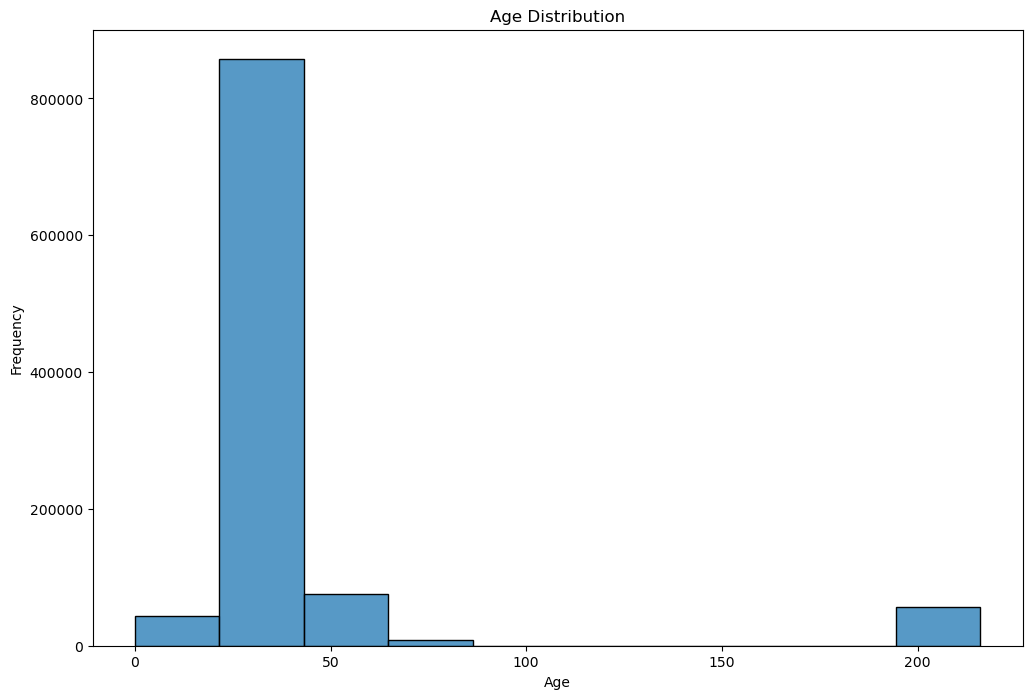

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(data["age"], bins=10, kde=False)
plt.xlabel("Age")           # <-- corrected from zlabel to xlabel
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()

In [47]:
data[data["age"] > 100]["CustomerDOB"].unique()


<DatetimeArray>
['1800-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [49]:
def replace_age_outlier(data):
    DOB_threshold = 1900

    # Find rows where year of birth is less than the threshold
    age_outliers = data[data["CustomerDOB"].dt.year < DOB_threshold].index

    # Calculate the mean of valid DOBs
    mean_DOB = data.loc[~data.index.isin(age_outliers), "CustomerDOB"].mean()

    # Replace outlier DOBs with the mean DOB
    data.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return data


In [51]:
# Fix any age outliers
data = replace_age_outlier(data)

# Recalculate age after fixing DOBs
data = calculate_age(data)


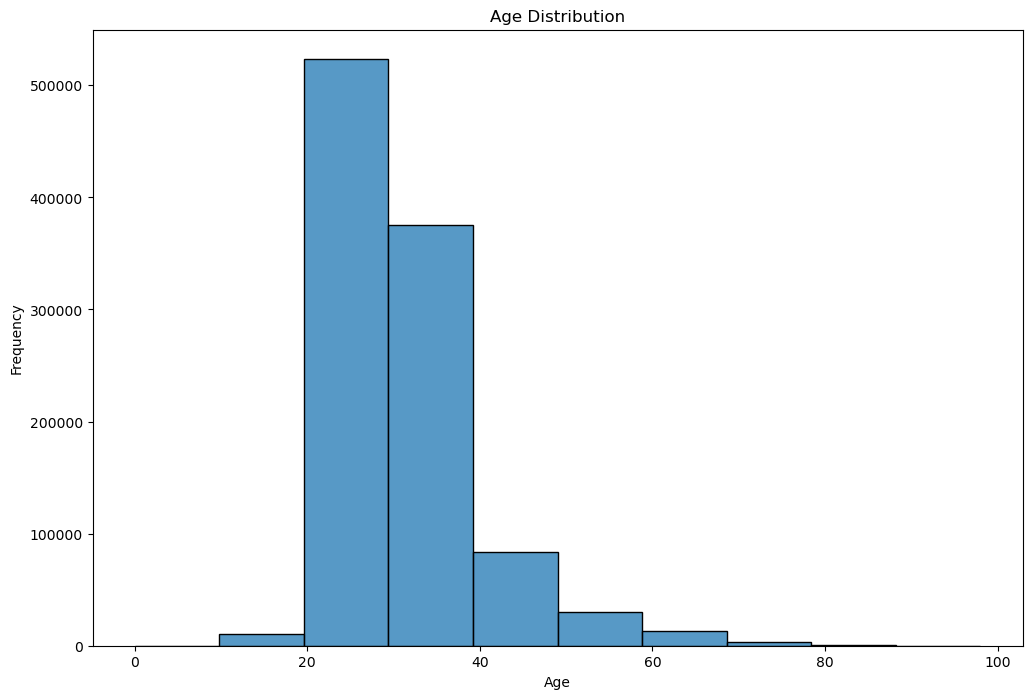

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(data["age"], bins=10, kde=False)
plt.xlabel("Age")           # <-- corrected from zlabel to xlabel
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()

**Gender**

In [54]:
data["CustGender"].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [55]:
#replace T in gender with M
data["CustGender"] = data["CustGender"].replace('T','M')

In [56]:
data["CustGender"].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

**Location**

In [59]:
data["CustLocation"].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

**Account Balance**

In [61]:
data["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

**Transaction Amount**

In [63]:
data["TransactionAmount (INR)"].sort_values(ascending = True)

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [67]:
(data["TransactionAmount (INR)"] == 0).sum()


820

In [74]:
data.drop(data[data["TransactionAmount (INR)"] == 0].index, axis=0, inplace=True)


In [75]:
(data["TransactionAmount (INR)"] == 0).sum()

0

In [76]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


# Exploratory Data Analysis

In [78]:
data["CustomerID"].unique()

array(['C5841053', 'C2142763', 'C4417068', ..., 'C8020229', 'C6459278',
       'C6420483'], dtype=object)

In [79]:
data.shape

(1040794, 10)

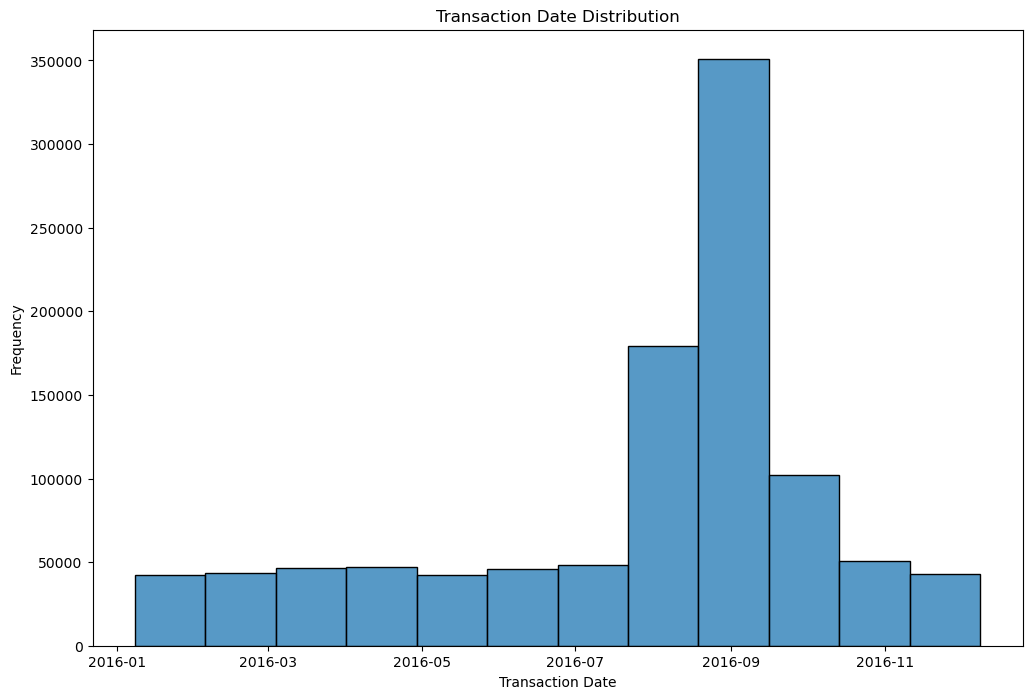

In [80]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(data["TransactionDate"], bins=12, kde = False)
plt.xlabel("Transaction Date")           
plt.ylabel("Frequency")     
plt.title("Transaction Date Distribution")
plt.show()

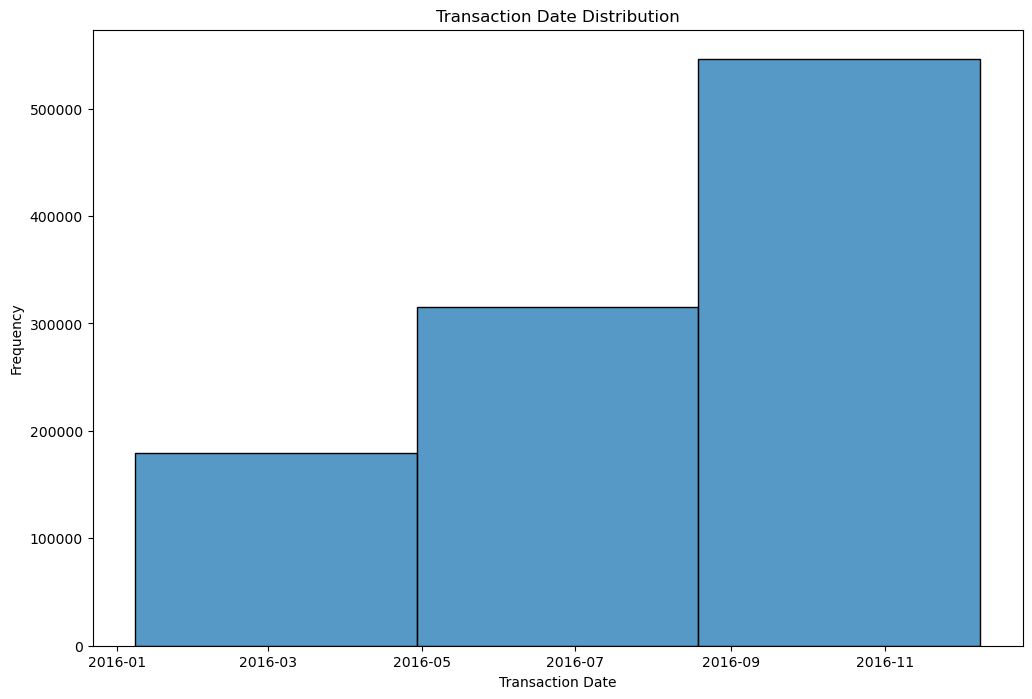

In [82]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(data["TransactionDate"], bins=3, kde = False)
plt.xlabel("Transaction Date")           
plt.ylabel("Frequency")     
plt.title("Transaction Date Distribution")
plt.show()

In [95]:
print(data.columns.tolist())

['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'age']


In [96]:
# Remove leading/trailing spaces
data.columns = data.columns.str.strip()

# Convert all column names to lowercase
data.columns = data.columns.str.lower()


In [97]:
print(data.columns.tolist())


['transactionid', 'customerid', 'customerdob', 'custgender', 'custlocation', 'custaccountbalance', 'transactiondate', 'transactiontime', 'transactionamount (inr)', 'age']


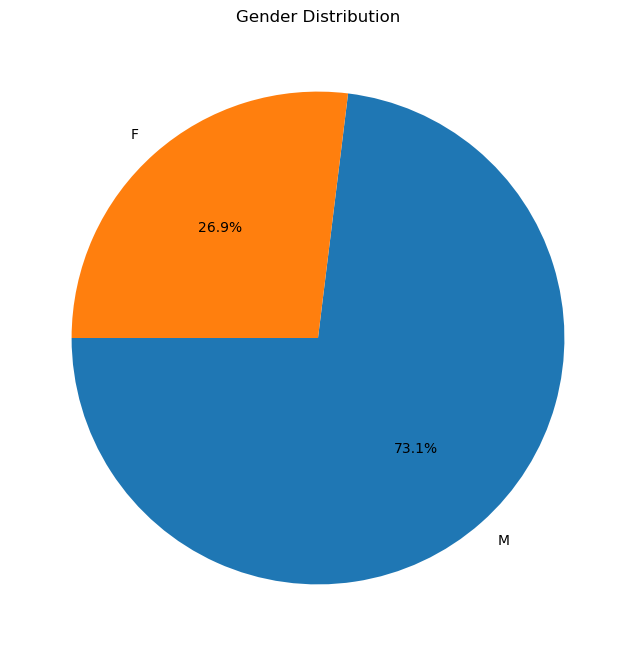

In [98]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_count = data['custgender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=180
)
plt.title("Gender Distribution")
plt.ylabel('')  # Optional: removes the default y-axis label
plt.show()


In [101]:
print(data.columns.tolist())

['transactionid', 'customerid', 'customerdob', 'custgender', 'custlocation', 'custaccountbalance', 'transactiondate', 'transactiontime', 'transactionamount (inr)', 'age']


In [102]:
# Remove leading/trailing spaces
data.columns = data.columns.str.strip()

# Convert all column names to lowercase
data.columns = data.columns.str.lower()


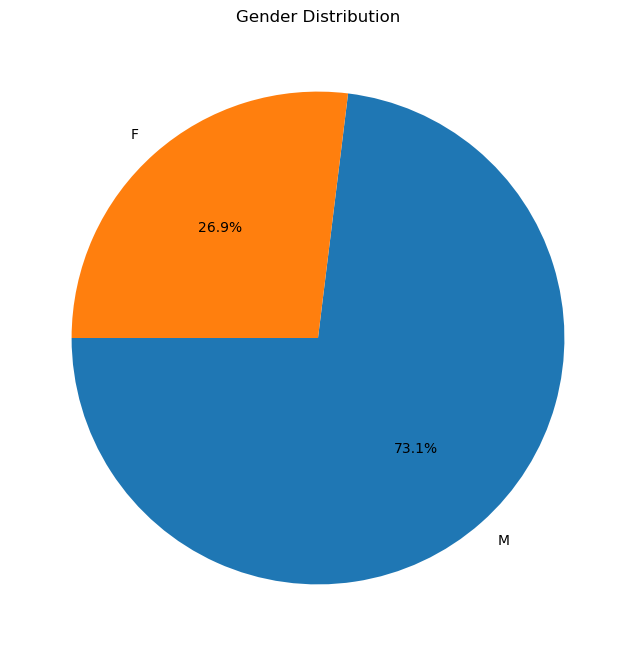

In [103]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_count = data['custgender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=180
)
plt.title("Gender Distribution")
plt.ylabel('')  # Optional: removes the default y-axis label
plt.show()


## RFM - Recency, Frequency, and Monetary value Analysis

In [104]:
data.head(3)

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20


## Recency

In [106]:
day = data["transactiondate"].max()

In [107]:
day

Timestamp('2016-12-09 00:00:00')

In [114]:
# Define 'day' as today's date
from datetime import datetime
day = datetime.now()

# Calculate Recency
Recency = data.groupby("customerid").agg({
    "transactiondate": lambda x: (day - x.max()).days + 1
})

In [115]:
Recency.head()

,transactiondate
customerid,
C1010011,3138
C1010012,3181
C1010014,3218
C1010018,3149
C1010024,3177


In [116]:
print(Recency.empty)

False


In [117]:
data["transactiondate"] = pd.to_datetime(data["transactiondate"], errors="coerce")

In [118]:
print(data["customerid"].nunique())

878763


In [119]:
print(Recency)

            transactiondate
customerid                 
C1010011               3138
C1010012               3181
C1010014               3218
C1010018               3149
C1010024               3177
...                     ...
C9099836               3218
C9099877               3149
C9099919               3177
C9099941               3167
C9099956               3139

[878763 rows x 1 columns]


## Frequency

In [120]:
Frequency = data.groupby("customerid")["transactionid"].count()

In [121]:
Frequency.head()

customerid
C1010011    2
C1010012    1
C1010014    2
C1010018    1
C1010024    1
Name: transactionid, dtype: int64

## Monetary value

In [122]:
Monetary = data.groupby("customerid")["transactionamount (inr)"].sum()

In [123]:
Monetary.head()

customerid
C1010011    5106.0
C1010012    1499.0
C1010014    1455.0
C1010018      30.0
C1010024    5000.0
Name: transactionamount (inr), dtype: float64

## Create RFM Table

In [125]:
RFM_table = pd.concat([Recency, Frequency, Monetary], axis=1)

In [126]:
RFM_table.head()

,transactiondate,transactionid,transactionamount (inr)
customerid,,,
C1010011,3138,2,5106.0
C1010012,3181,1,1499.0
C1010014,3218,2,1455.0
C1010018,3149,1,30.0
C1010024,3177,1,5000.0


In [131]:
RFM_table = RFM_table.rename(columns={
    "TransactionDate": "recency", 
    "Transaction ID": "frequency", 
    "TransactionAmount (INR)": "Monetary"
})


In [133]:
print(RFM_table.columns)

Index(['transactiondate', 'transactionid', 'transactionamount (inr)'], dtype='object')


In [134]:
RFM_table = RFM_table.rename(columns={
    "transactiondate": "recency", 
    "transactionid": "frequency", 
    "transactionamount (inr)": "monetary"
})

In [135]:
print(RFM_table.head())

            recency  frequency  monetary
customerid                              
C1010011       3138          2    5106.0
C1010012       3181          1    1499.0
C1010014       3218          2    1455.0
C1010018       3149          1      30.0
C1010024       3177          1    5000.0


## Explore RFM Table

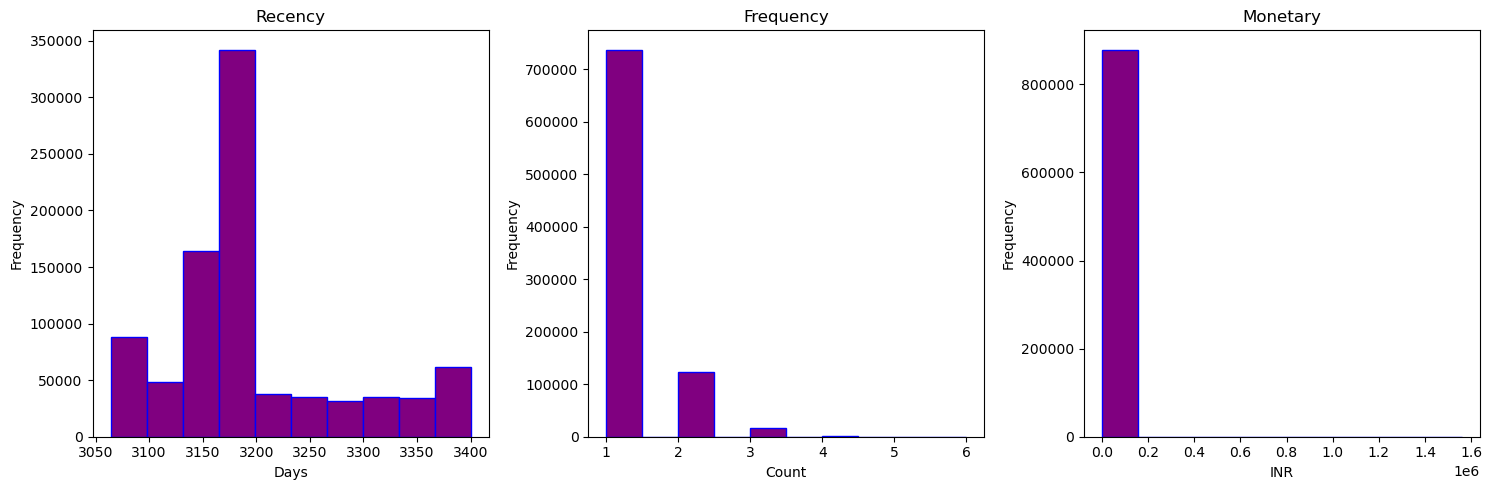

In [136]:
# Explore RFM Table
fig, axis = plt.subplots(1, 3, figsize=(15, 5))  # Corrected to `plt.subplots`
columns = ["recency", "frequency", "monetary"]  # Ensure column names match RFM_table

for i, col in enumerate(columns):  # Use enumerate to loop through columns
    axis[i].hist(RFM_table[col], bins=10, color="purple", edgecolor="blue")  # Fix parameters
    axis[i].set_title(col.capitalize())  # Capitalize column name for title
    axis[i].set_xlabel("Days" if col == "recency" else "Count" if col == "frequency" else "INR")  # Conditional label
    axis[i].set_ylabel("Frequency")  # Set Y-axis label

plt.tight_layout()  # Corrected typo in layout function
plt.show()

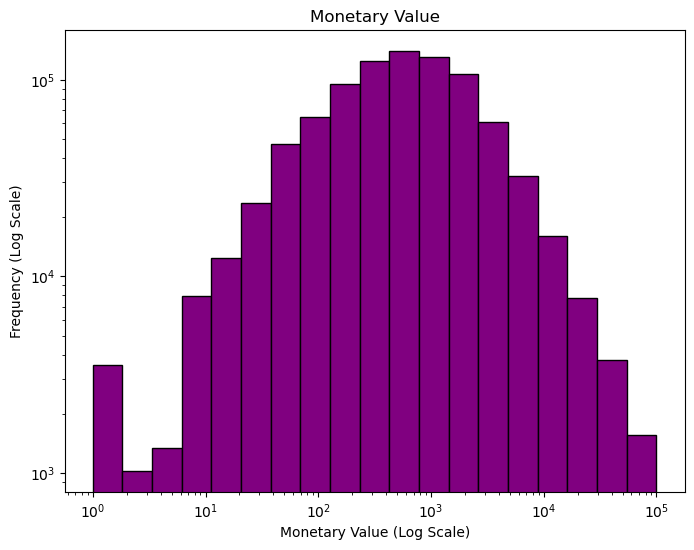

In [137]:
plt.figure(figsize=(8, 6))
plt.hist(RFM_table["monetary"], bins=np.logspace(0, 5, 20), color="purple", edgecolor="black")  # Fixed typos
plt.title("Monetary Value")
plt.xlabel("Monetary Value (Log Scale)")  # Fixed typo in xlabel
plt.ylabel("Frequency (Log Scale)")      # Fixed typo in ylabel
plt.xscale("log")
plt.yscale("log")
plt.show()

In [138]:
RFM_table.corr()

,recency,frequency,monetary
recency,1.000000,-0.207705,-0.018321
frequency,-0.207705,1.000000,0.097491
monetary,-0.018321,0.097491,1.000000
